In [3]:
# Importing the stock market data.

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# yfinance has been pre installed

WFC_DF = yf.download('WFC', start = '2018-4-29',end='2023-05-08')
WFC_ticker = yf.Ticker('WFC')

BAC_DF = yf.download('BAC', start = '2018-4-29',end='2023-05-08')
BAC_ticker = yf.Ticker('BAC')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Exporting the data to .csv and then importing it to ensure offline access.
# I swap between two different devices so I use Onedrive.

WFC_DF.to_csv('C:/Users/Name/OneDrive/WFC.csv', sep=str(','))
BAC_DF.to_csv('C:/Users/Name/OneDrive/BAC.csv', sep=str(','))
WFC_DF = pd.read_csv('C:/Users/Name/OneDrive/WFC.csv',index_col='Date', parse_dates =[0])
BAC_DF = pd.read_csv('C:/Users/Name/OneDrive/BAC.csv',index_col='Date', parse_dates =[0])

In [47]:
# Calculating daily returns for the mean return.
''''
# Worked but produced the wrong values.

def Daily_R(Open, Close):
    Daily_return = Open - Close/Open
    return (Daily_return)

WFC_DF['Daily Return'] = WFC_DF[
    ['Open','Adj Close']].apply(
    lambda df: Daily_R(
        df['Open'],df['Adj Close']), axis=1)

BAC_DF['Daily Return'] = BAC_DF[
    ['Open','Adj Close']].apply(
    lambda df: Daily_R(
        df['Open'],df['Adj Close']), axis=1)
'''''
# Other method for ssame results:
# WFC_DF['Daily Return'] = np.vectorize(Daily_R)(df['Open'],df['Adj Close'])
# BAC_DF['Daily Return'] = np.vectorize(Daily_R)(df['Open'],df['Adj Close'])

# Gives an error: 
# WFC_DF['Daily Return'] = (['Adj Close'] - ['Open']/['Open'])
# BAC_DF['Daily Return'] = (['Adj Close'] - ['Open']/['Open'])
# A list cannot be divided by a list.

# Working method
WFC_DF['Daily Returns'] = WFC_DF['Adj Close'].pct_change(1)
BAC_DF['Daily Returns'] = BAC_DF['Adj Close'].pct_change(1)
# Produces the intended results

print(round(WFC_DF['Daily Return'].head() * 100,2))
print(round(BAC_DF['Daily Return'].head() * 100,2))

# apply() applies the function across the selected dataframe columns.
# lambda is a small one time function, it is required to specifiy multiple columns.
# np.vectorize is a covenance function that replaces apply() included with numpy.

Date
2018-05-02     NaN
2018-05-03   -0.50
2018-05-04    1.69
2018-05-07    0.48
2018-05-08    1.01
Name: Daily Return, dtype: float64
Date
2018-05-02     NaN
2018-05-03   -1.28
2018-05-04    0.34
2018-05-07    1.16
2018-05-08    0.98
Name: Daily Return, dtype: float64


In [45]:
# Showing the dataframes

print(WFC_DF.head())
print(BAC_DF.head())

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-05-02  52.380001  52.869999  52.060001  52.189999  44.806957  16397200   
2018-05-03  51.619999  51.790001  50.810001  51.540001  44.582058  19216100   
2018-05-04  51.169998  52.900002  51.070000  52.410000  45.334614  16660500   
2018-05-07  52.970001  52.990002  52.380001  52.660000  45.550858  16259100   
2018-05-08  52.720001  53.709999  52.630001  53.189999  46.009312  20786200   

            Daily Return  
Date                      
2018-05-02           NaN  
2018-05-03     -0.005019  
2018-05-04      0.016880  
2018-05-07      0.004770  
2018-05-08      0.010065  
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-05-02  29.950001  30.070000  29.559999  29.580000  26.446245   68234600   
2018-05-03  29.51

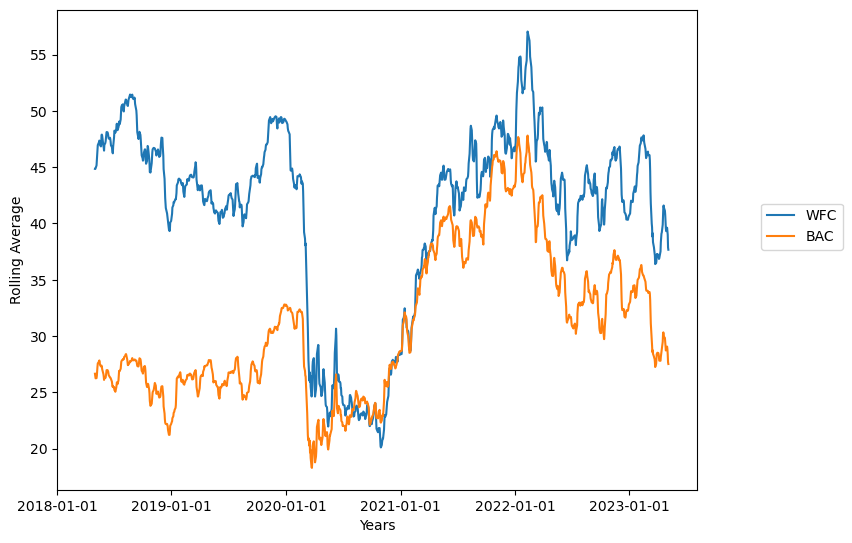

In [27]:
# Calculating the rolling mean for three days.

x1 = WFC_DF['Adj Close'].rolling(window=3).mean()
x2 = BAC_DF['Adj Close'].rolling(window=3).mean()

fig = plt.figure()

ax = fig.add_axes([0,0,1,1],xlabel = 'Years', ylabel = 'Rolling Average')

ax.plot(x1,label='WFC')

ax.plot(x2, label = 'BAC') # Creates a second line

ax.legend(loc='lower left') # moving the legend around.

ax.legend(loc=(1.1,0.5)) # puts the legend on the far right outside of the plot.

plt.xticks(ha='center',ticks = ['2018','2019','2020','2021','2022', '2023']) 

plt.show()

# fig.savefig('Rolling_Mean.png',bbox_inches='tight')

# Every three days this sums the Adj Close column values and divides by 3.
# Then it moves down by one day and does it again.
# No data for the first two days.

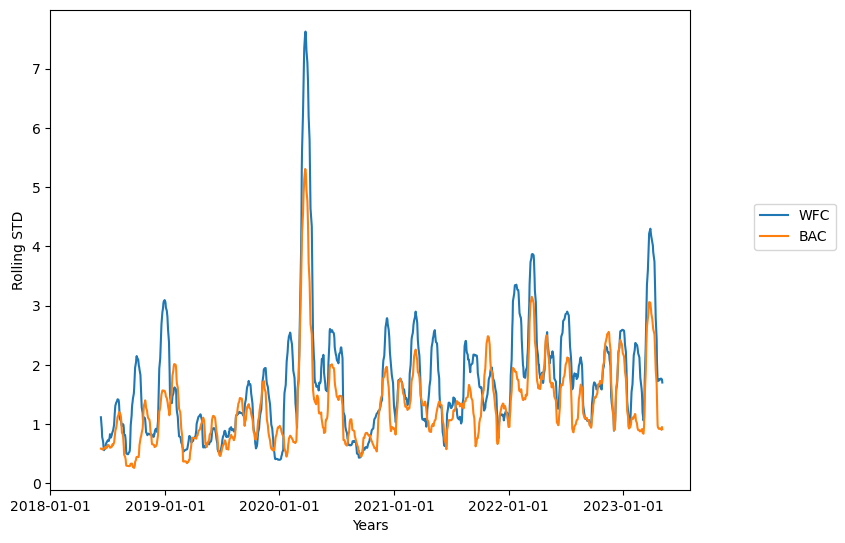

In [28]:
# Calculating Rolling Standard Deviiation to show volatility.

x1 = WFC_DF['Adj Close'].rolling(30).std()
x2 = BAC_DF['Adj Close'].rolling(30).std()

fig = plt.figure()

ax = fig.add_axes([0,0,1,1], xlabel = 'Years', ylabel = 'Rolling STD')

ax.plot(x1,label='WFC')

ax.plot(x2, label = 'BAC') # Creates a second line

ax.legend(loc='lower left') # moving the legend around.

ax.legend(loc=(1.1,0.5)) # puts the legend on the far right outside of the plot.

plt.xticks(ha='center',ticks = ['2018','2019','2020','2021','2022', '2023'])

plt.show()

# fig.savefig('Rolling_STD.png',bbox_inches='tight')

# std is short for standard deviation
# std is the square root of the sum of (each value - mean)/ number of examples - 1.
# the division does not take place until the summing is complete.

#### Ratio rating for all risk ratios below:

* 0-1 Bad
* 1-2 Good
* 2-3 Very good
* '>= 3' Excellent

In [77]:
# Daily & Annual Sharpie Ratio

def annual_sharpe_ratio(df,risk_free=0):
    mean_return = df['Daily Return'].mean()
    standard_deviation = df['Daily Return'].std()
    sharpe_ratio = (mean_return-risk_free)/standard_deviation
    return sharpe_ratio * np.sqrt(252) 

def daily_sharpe_ratio(df,risk_free=0):
    mean_return = df['Daily Return'].mean()
    standard_deviation = df['Daily Return'].std()
    sharpe_ratio = (mean_return-risk_free)/standard_deviation
    return sharpe_ratio

Sharpe_WFC_daily = daily_sharpe_ratio(WFC_DF)    
Sharpe_BAC_daily = daily_sharpe_ratio(BAC_DF)
Sharpe_WFC_annual = annual_sharpe_ratio(WFC_DF)    
Sharpe_BAC_annual = annual_sharpe_ratio(BAC_DF)

print(f' Daily Sharpe Ratios: \n WFC: {round(Sharpe_WFC_daily,5)} \n BAC: {round(Sharpe_BAC_daily,5)}')
print(' ')
print(f' Annual Sharpe Ratios: \n WFC: {round(Sharpe_WFC_annual,5)} \n BAC: {round(Sharpe_BAC_annual,5)}')

# risk free is assumed to be zero.
# Sharpe ratio is a measure of risk and return usally on an annual basies so multiplied by 252**0.5 or np.sqrt(252).
# np.sqrt(252) assumes you have imported numpy, sqrt is short for square root.
# Higher standard deviation (volatility) decreases the sharpe ratio.

 Daily Sharpe Ratios: 
 WFC: 0.00634 
 BAC: 0.01283
 
 Annual Sharpe Ratios: 
 WFC: 0.10066 
 BAC: 0.20373


In [76]:
# Annual Sortino Ratio

def annual_sortino_ratio(df,threshold=0,risk_free_rate=0):
    mean_return = df['Daily Return'].mean()
    downside = df[df['Daily Return']<threshold]['Daily Return'] # Filtering for negative returns.
    negative_standard_deviation = downside.std()
    sortino_ratio = (mean_return-risk_free_rate)/negative_standard_deviation
    return sortino_ratio * (252**0.5)

sortino_WFC_annual = annual_sortino_ratio(WFC_DF)    
sortino_BAC_annual = annual_sortino_ratio(BAC_DF)

print(f' Annual Sortino Ratios: \n WFC: {round(sortino_WFC_annual,5)} \n BAC: {round(sortino_BAC_annual,5)}')

# We only take into account the daily and yearly returns below a certain threshold. 
# The difference here is that we are only looking at the standard deviation (volatility), where returns are negative.
# BAC has more negative returns.

 Annual Sortino Ratios: 
 WFC: 0.13682 
 BAC: 0.28718


#### PEMDAS:
* parentheses
* exponents
* multiplication
* Addition
* Subraction
* Important for below

#### Normal Distribution:

* Symmetrical on both sides of the curve.
* Displays three standard deviation from the center (mean) on both sides.
* Commonly used in hypothesis testing to determine if based on alpha the null hypothesis should be rejected.
* Goes until infinity.

<img src="https://kanbanize.com/blog/wp-content/uploads/2014/07/Standard_deviation_diagram.png" alt="image info" width = 500px height = 500px />

In [ ]:
# Probabilistic Sharpe Ratio

import scipy.stats

def probabilistic_sharpe_ratio(df,benchmark=0):
    sharpe_ratio = daily_sharpe_ratio(df) # function showin above 
    skew = scipy.stats.skew(df['Daily Return'])
    kurtosis = scipy.stats.kurtosis(df['Daily Return'])
    n = len(df)
    sigma_sr = ( (1/(n-1))  (1 + 0.5*sharpe_ratio**2 + skew*sharpe_ratio+(kurtosis/4 )*sharpe_ratio**2 ))
    ratio = (benchmark/sigma_sr)
    probabilistic_sharpe_ratio = scipy.stats.norm.cdf(ratio)
    return probabilistic_sharpe_ratio

daily_PSR_WFC = probabilistic_sharpe_ratio(WFC_DF)
annual_PSR_WFC = PSR_WFC * (252**0.5)

daily_PSR_BAC = probabilistic_sharpe_ratio(BAC_DF)
annual_PSR_BAC = PSR_BACK * (252**0.5)

# In this example we are comparing the benchmark psr of 0 to the calculated psr.
# The probabilistic Sharpe Ratio (PSR) takes into account the skew and kurtosis of returns to a Sharpe Ratio.
# A much more complicated version of the Sharpe Ratio. 
# Probability in this formula follow the normal distribiution showin above.
# In other words probability in addition to volatility.
# full explanation with formula: https://quantdare.com/probabilistic-sharpe-ratio/ # third formula on the page. 
# This example is work in progress and creating an error when trying to call float objects.